In [37]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [38]:
df.drop(columns=['date', 'bedrooms', 'bathrooms','floors','waterfront','view','condition','street','statezip'],inplace=True)

In [39]:
df.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,313000.0,1340,7912,1340,0,1955,2005,Shoreline,USA
1,2384000.0,3650,9050,3370,280,1921,0,Seattle,USA
2,342000.0,1930,11947,1930,0,1966,0,Kent,USA
3,420000.0,2000,8030,1000,1000,1963,0,Bellevue,USA
4,550000.0,1940,10500,1140,800,1976,1992,Redmond,USA


In [40]:
df.shape

(4600, 9)

In [41]:
df.isnull().sum()

price            0
sqft_living      0
sqft_lot         0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
country          0
dtype: int64

In [42]:
print(f"Number of duplicate values :{df.duplicated().sum()}")

Number of duplicate values :0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   sqft_living    4600 non-null   int64  
 2   sqft_lot       4600 non-null   int64  
 3   sqft_above     4600 non-null   int64  
 4   sqft_basement  4600 non-null   int64  
 5   yr_built       4600 non-null   int64  
 6   yr_renovated   4600 non-null   int64  
 7   city           4600 non-null   object 
 8   country        4600 non-null   object 
dtypes: float64(1), int64(6), object(2)
memory usage: 323.6+ KB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0
sqft_basement,4600.0,312.081522,464.137228,0.0,0.00,0.000000,610.00,4820.0
yr_built,4600.0,1970.786304,29.731848,1900.0,1951.00,1976.000000,1997.00,2014.0
yr_renovated,4600.0,808.608261,979.414536,0.0,0.00,0.000000,1999.00,2014.0


In [45]:
df.head(10)

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,313000.0,1340,7912,1340,0,1955,2005,Shoreline,USA
1,2384000.0,3650,9050,3370,280,1921,0,Seattle,USA
2,342000.0,1930,11947,1930,0,1966,0,Kent,USA
3,420000.0,2000,8030,1000,1000,1963,0,Bellevue,USA
4,550000.0,1940,10500,1140,800,1976,1992,Redmond,USA
5,490000.0,880,6380,880,0,1938,1994,Seattle,USA
6,335000.0,1350,2560,1350,0,1976,0,Redmond,USA
7,482000.0,2710,35868,2710,0,1989,0,Maple Valley,USA
8,452500.0,2430,88426,1570,860,1985,0,North Bend,USA
9,640000.0,1520,6200,1520,0,1945,2010,Seattle,USA


In [46]:
df['area(sqft)'] = df['sqft_living'] + df['sqft_lot']
df.head(15)

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,city,country,area(sqft)
0,313000.0,1340,7912,1340,0,1955,2005,Shoreline,USA,9252
1,2384000.0,3650,9050,3370,280,1921,0,Seattle,USA,12700
2,342000.0,1930,11947,1930,0,1966,0,Kent,USA,13877
3,420000.0,2000,8030,1000,1000,1963,0,Bellevue,USA,10030
4,550000.0,1940,10500,1140,800,1976,1992,Redmond,USA,12440
5,490000.0,880,6380,880,0,1938,1994,Seattle,USA,7260
6,335000.0,1350,2560,1350,0,1976,0,Redmond,USA,3910
7,482000.0,2710,35868,2710,0,1989,0,Maple Valley,USA,38578
8,452500.0,2430,88426,1570,860,1985,0,North Bend,USA,90856
9,640000.0,1520,6200,1520,0,1945,2010,Seattle,USA,7720


In [47]:
current_year = datetime.now().year
# df['house_age'] = current_year - df['']
df['house_age'] = df.apply(
    lambda row: current_year - row['yr_renovated'] if row['yr_renovated'] > 0 else current_year - row['yr_built'],
    axis=1
)
df.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,city,country,area(sqft),house_age
0,313000.0,1340,7912,1340,0,1955,2005,Shoreline,USA,9252,20
1,2384000.0,3650,9050,3370,280,1921,0,Seattle,USA,12700,104
2,342000.0,1930,11947,1930,0,1966,0,Kent,USA,13877,59
3,420000.0,2000,8030,1000,1000,1963,0,Bellevue,USA,10030,62
4,550000.0,1940,10500,1140,800,1976,1992,Redmond,USA,12440,33


In [48]:
df.drop(columns=['sqft_living','sqft_lot','sqft_above','sqft_basement','country','yr_built','yr_renovated'],inplace=True)


In [49]:
df.head(6)

,price,city,area(sqft),house_age
0,313000.0,Shoreline,9252,20
1,2384000.0,Seattle,12700,104
2,342000.0,Kent,13877,59
3,420000.0,Bellevue,10030,62
4,550000.0,Redmond,12440,33
5,490000.0,Seattle,7260,31


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.0,460943.461539,654962.5,26590000.0
area(sqft),4600.0,16991.863043,36099.510869,1423.0,7105.0,9666.000000,13443.5,1077228.0
house_age,4600.0,39.957391,26.863922,11.0,20.0,31.000000,52.0,125.0


In [51]:
df.groupby('city')['city'].count()

city
Algona                    5
Auburn                  176
Beaux Arts Village        1
Bellevue                286
Black Diamond             9
Bothell                  33
Burien                   74
Carnation                22
Clyde Hill               11
Covington                43
Des Moines               58
Duvall                   42
Enumclaw                 28
Fall City                11
Federal Way             148
Inglewood-Finn Hill       1
Issaquah                187
Kenmore                  66
Kent                    185
Kirkland                187
Lake Forest Park         36
Maple Valley             96
Medina                   11
Mercer Island            86
Milton                    2
Newcastle                33
Normandy Park            18
North Bend               50
Pacific                   6
Preston                   2
Ravensdale                7
Redmond                 235
Renton                  293
Sammamish               175
SeaTac                   29
Seattle        

In [67]:
def remove_outliers(dataframe, columns):
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)  # First quartile (25%)
        Q3 = dataframe[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out outliers
        dataframe = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]
    
    return dataframe

In [70]:
df.head()

,price,city,area(sqft),house_age
0,313000.0,Shoreline,9252,20
1,2384000.0,Seattle,12700,104
2,342000.0,Kent,13877,59
3,420000.0,Bellevue,10030,62
4,550000.0,Redmond,12440,33


In [72]:
numeric_columns = ['price', 'area(sqft)', 'house_age']
cleaned_data = remove_outliers(df,numeric_columns)
cleaned_data.head()


,price,city,area(sqft),house_age
0,313000.0,Shoreline,9252,20
2,342000.0,Kent,13877,59
3,420000.0,Bellevue,10030,62
4,550000.0,Redmond,12440,33
5,490000.0,Seattle,7260,31


In [73]:
cleaned_data.shape

(3684, 4)

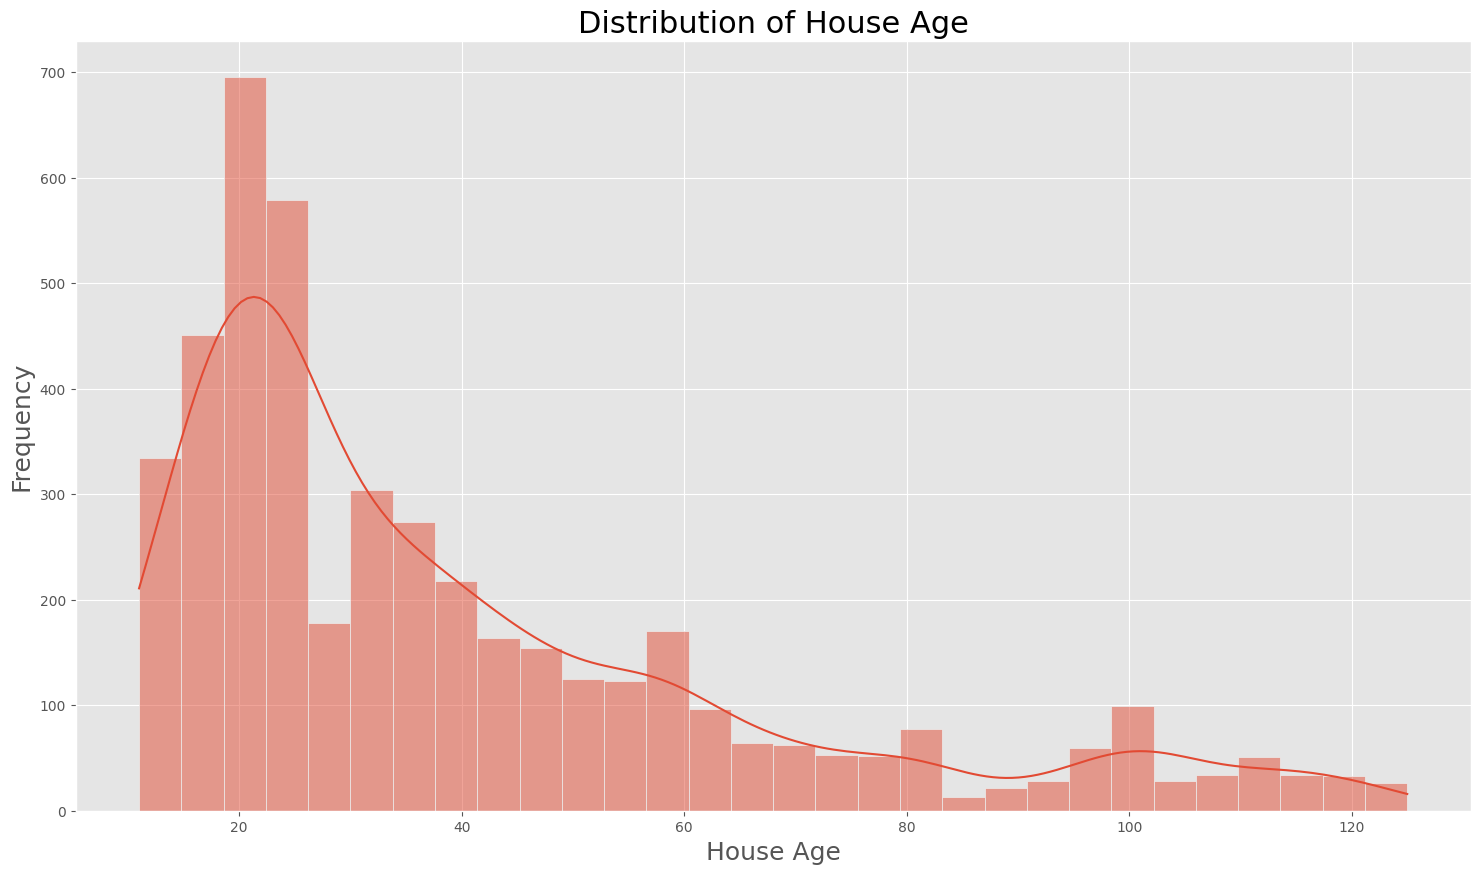

In [57]:
plt.figure(figsize=(18,10))
sns.histplot(df['house_age'],kde=True)
plt.title('Distribution of House Age',fontsize=22)
plt.xlabel('House Age',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.show()


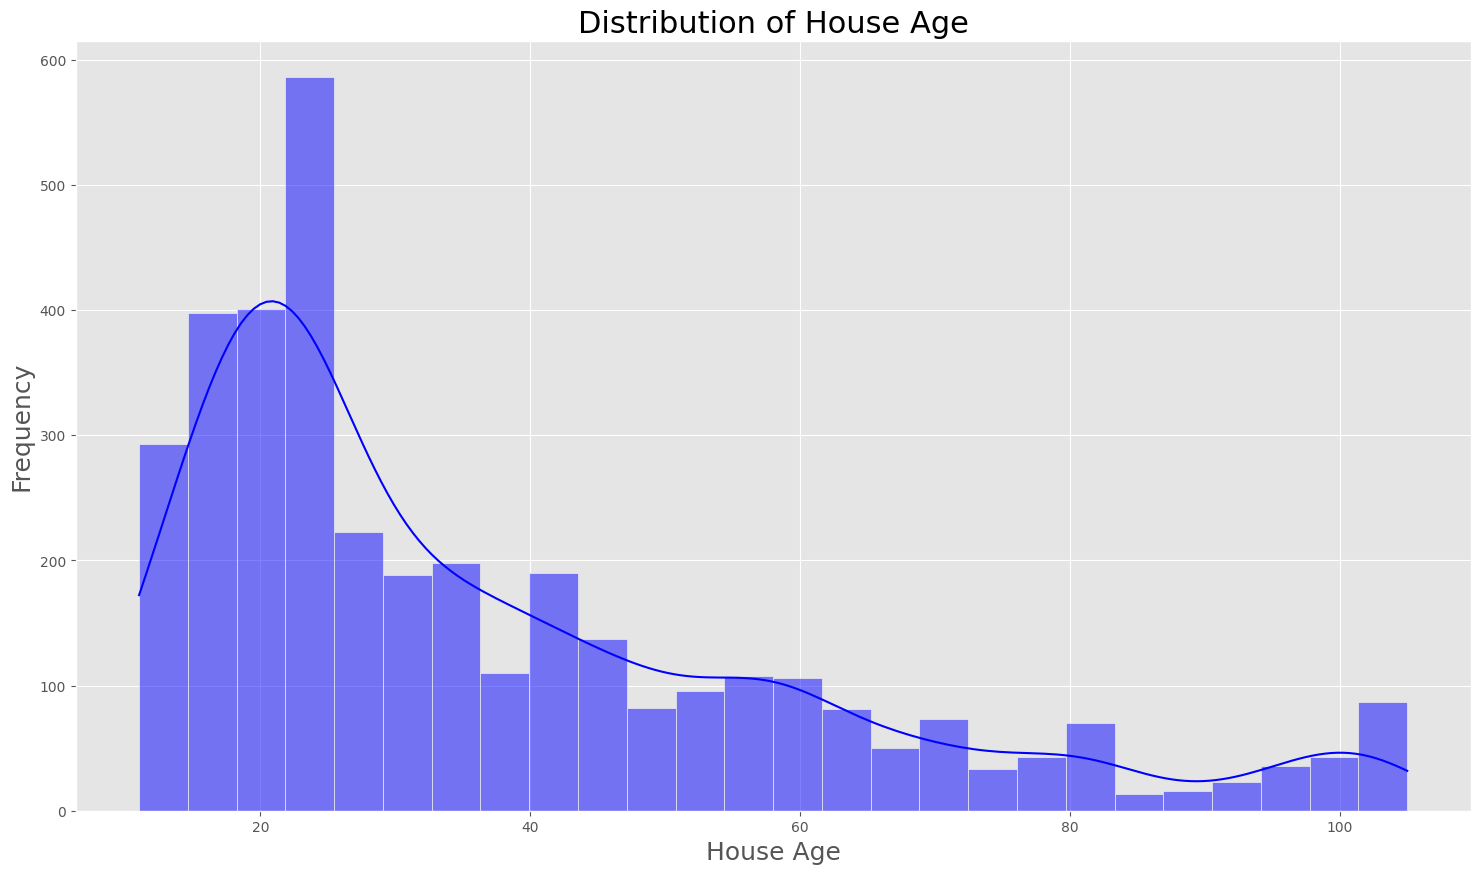

In [87]:
plt.figure(figsize=(18,10))
sns.histplot(cleaned_data['house_age'],kde=True,color='b')
plt.title('Distribution of House Age',fontsize=22)
plt.xlabel('House Age',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.show()

# ------------------------------------------------------

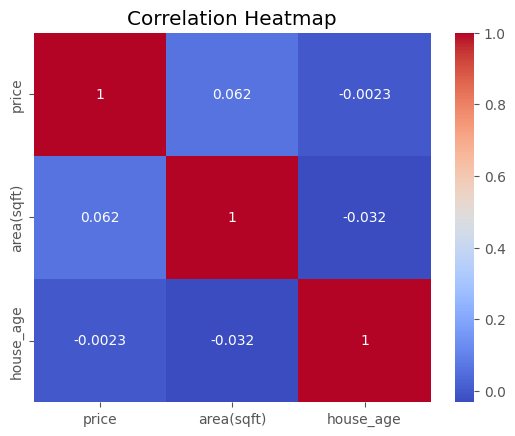

In [58]:
numeric_data = df.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

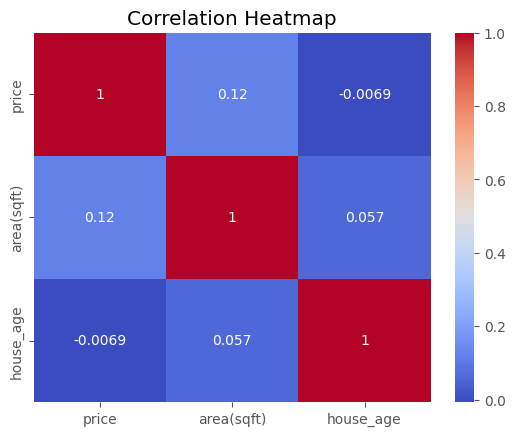

In [76]:
numeric_data = cleaned_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# ------------------------------------------------------

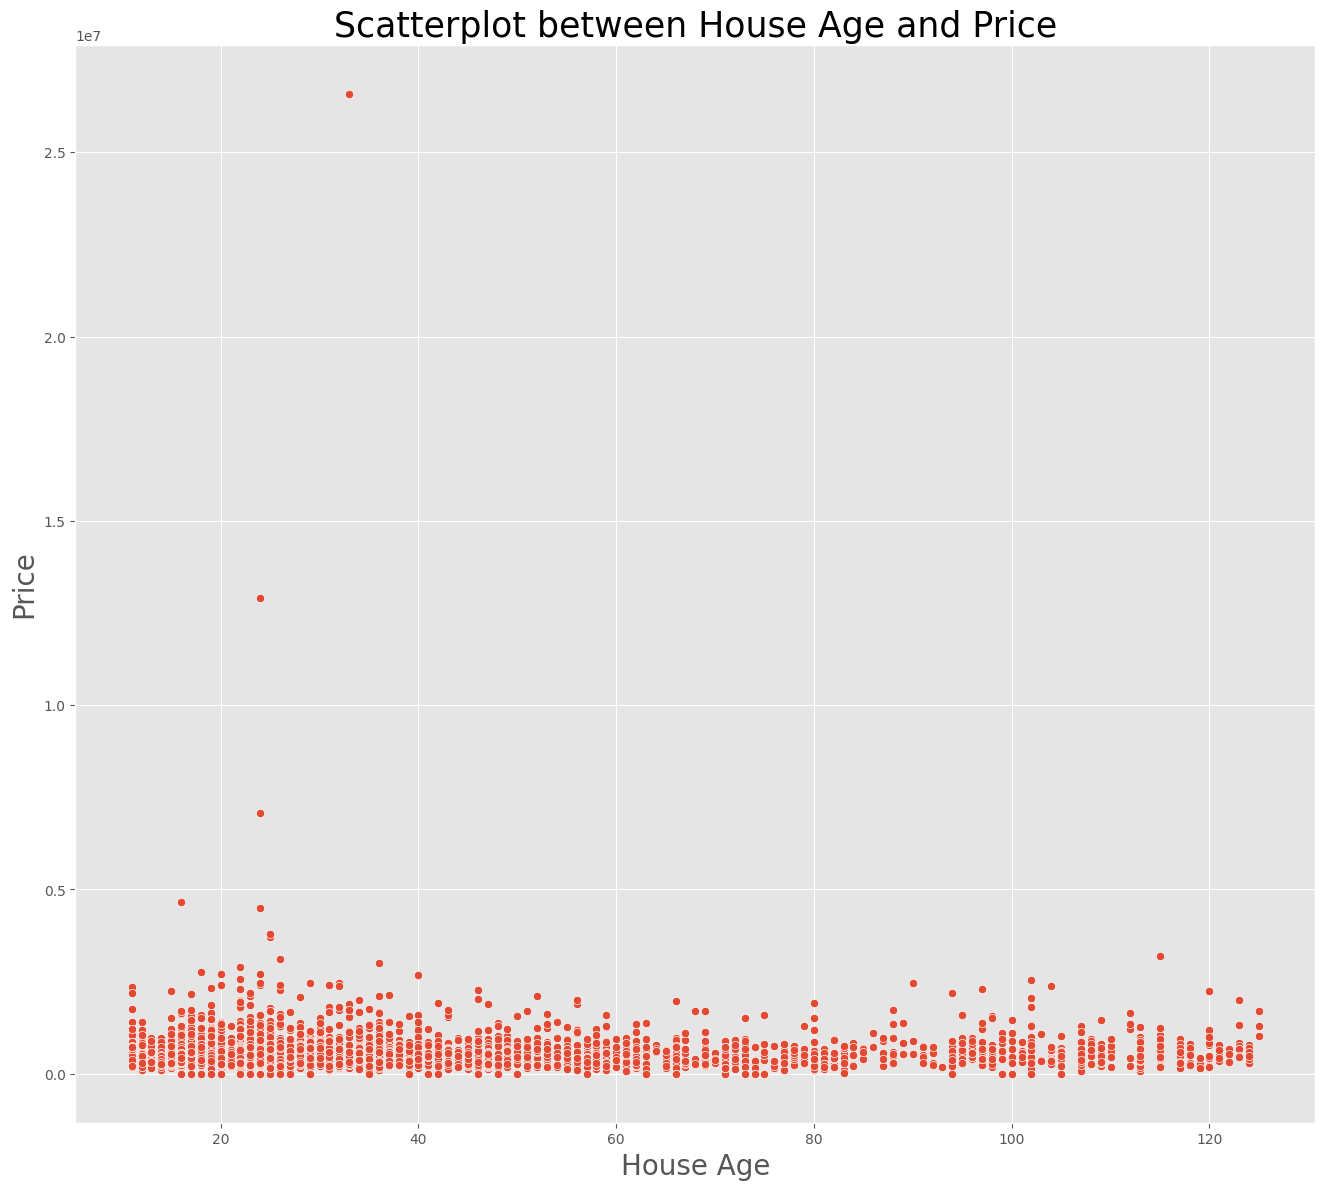

In [59]:
plt.figure(figsize=(16,14))
sns.scatterplot(x=df['house_age'], y=df['price'])
plt.title('Scatterplot between House Age and Price',fontsize= 25)
plt.xlabel('House Age',fontsize= 20)
plt.ylabel('Price',fontsize= 20)
plt.show()


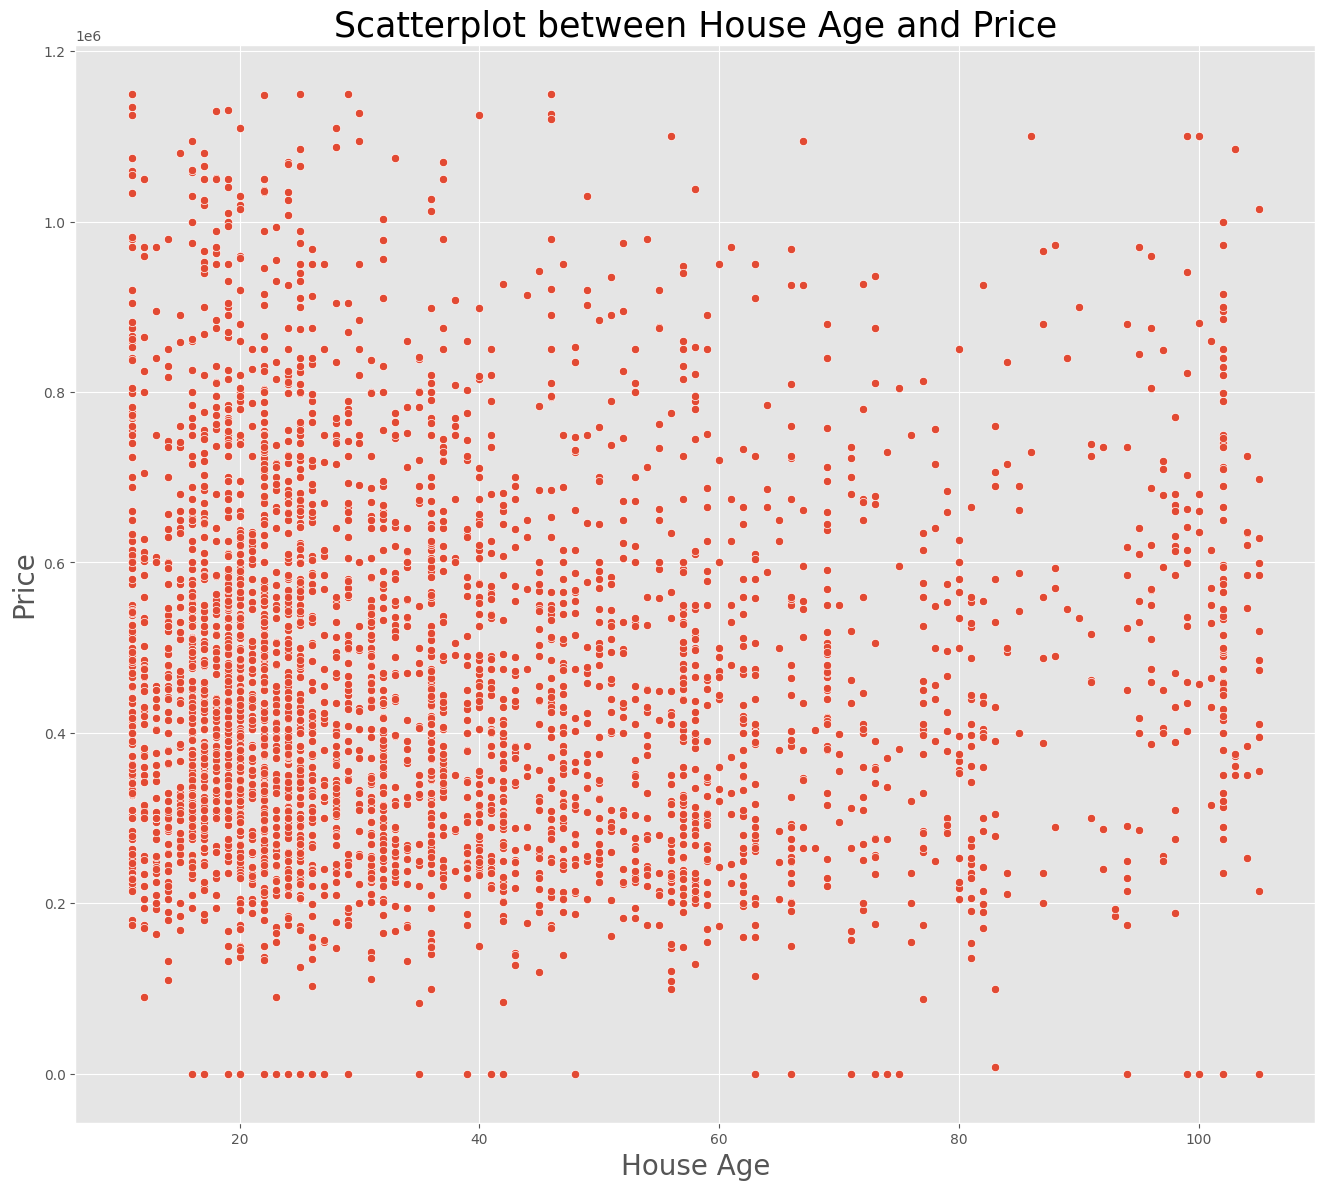

In [77]:
plt.figure(figsize=(16,14))
sns.scatterplot(x=cleaned_data['house_age'], y=cleaned_data['price'])
plt.title('Scatterplot between House Age and Price',fontsize= 25)
plt.xlabel('House Age',fontsize= 20)
plt.ylabel('Price',fontsize= 20)
plt.show()

# ------------------------------------------

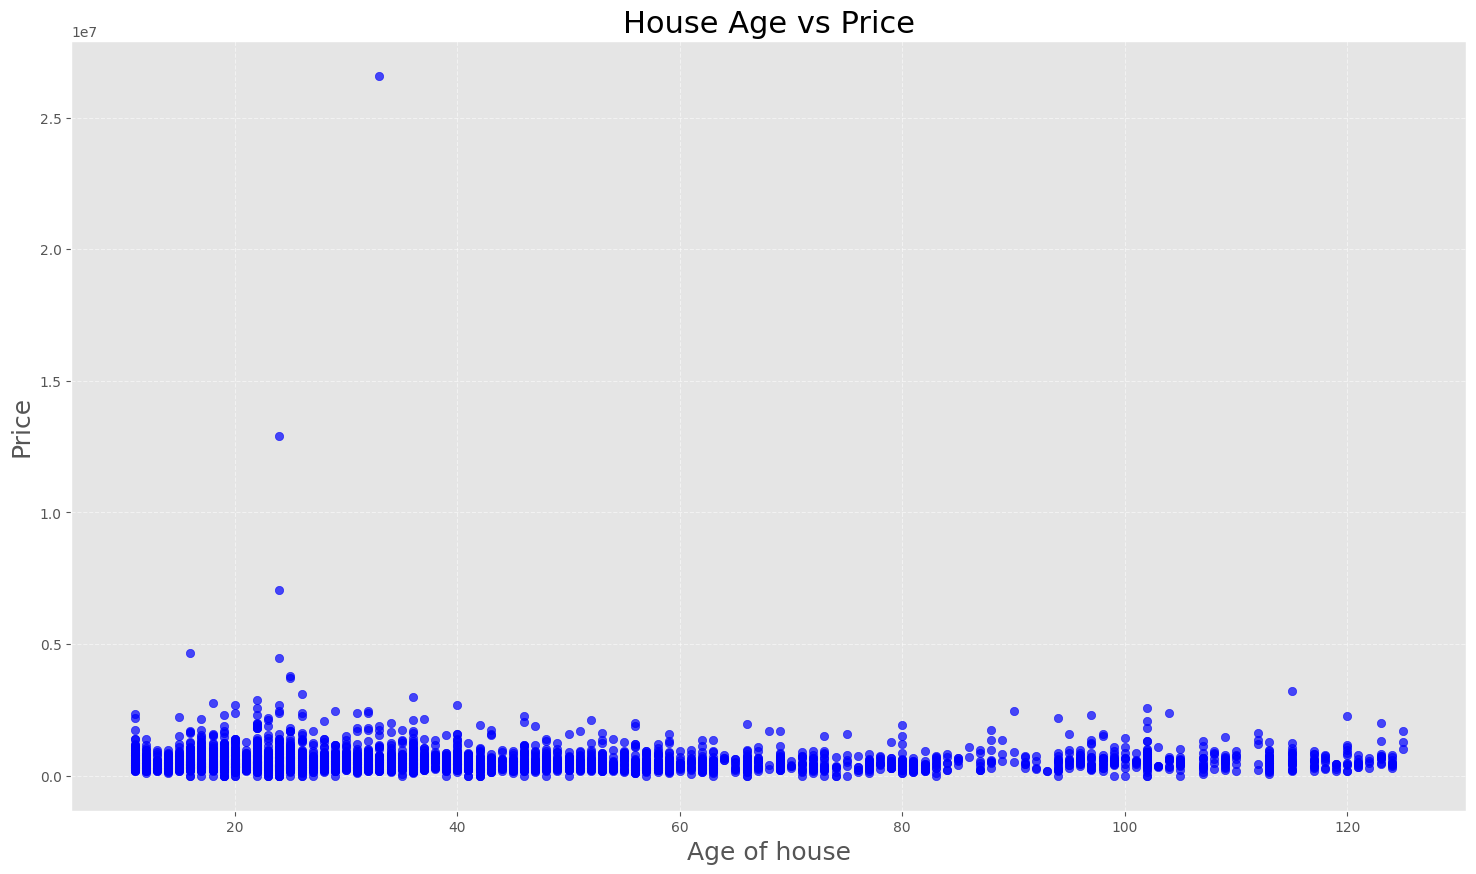

In [60]:
plt.style.use('ggplot')

plt.figure(figsize=(18,10))
plt.scatter(df['house_age'], df['price'],color='blue',alpha=0.7)
plt.title('House Age vs Price',fontsize=22)
plt.xlabel('Age of house',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

# -------------------------------------------

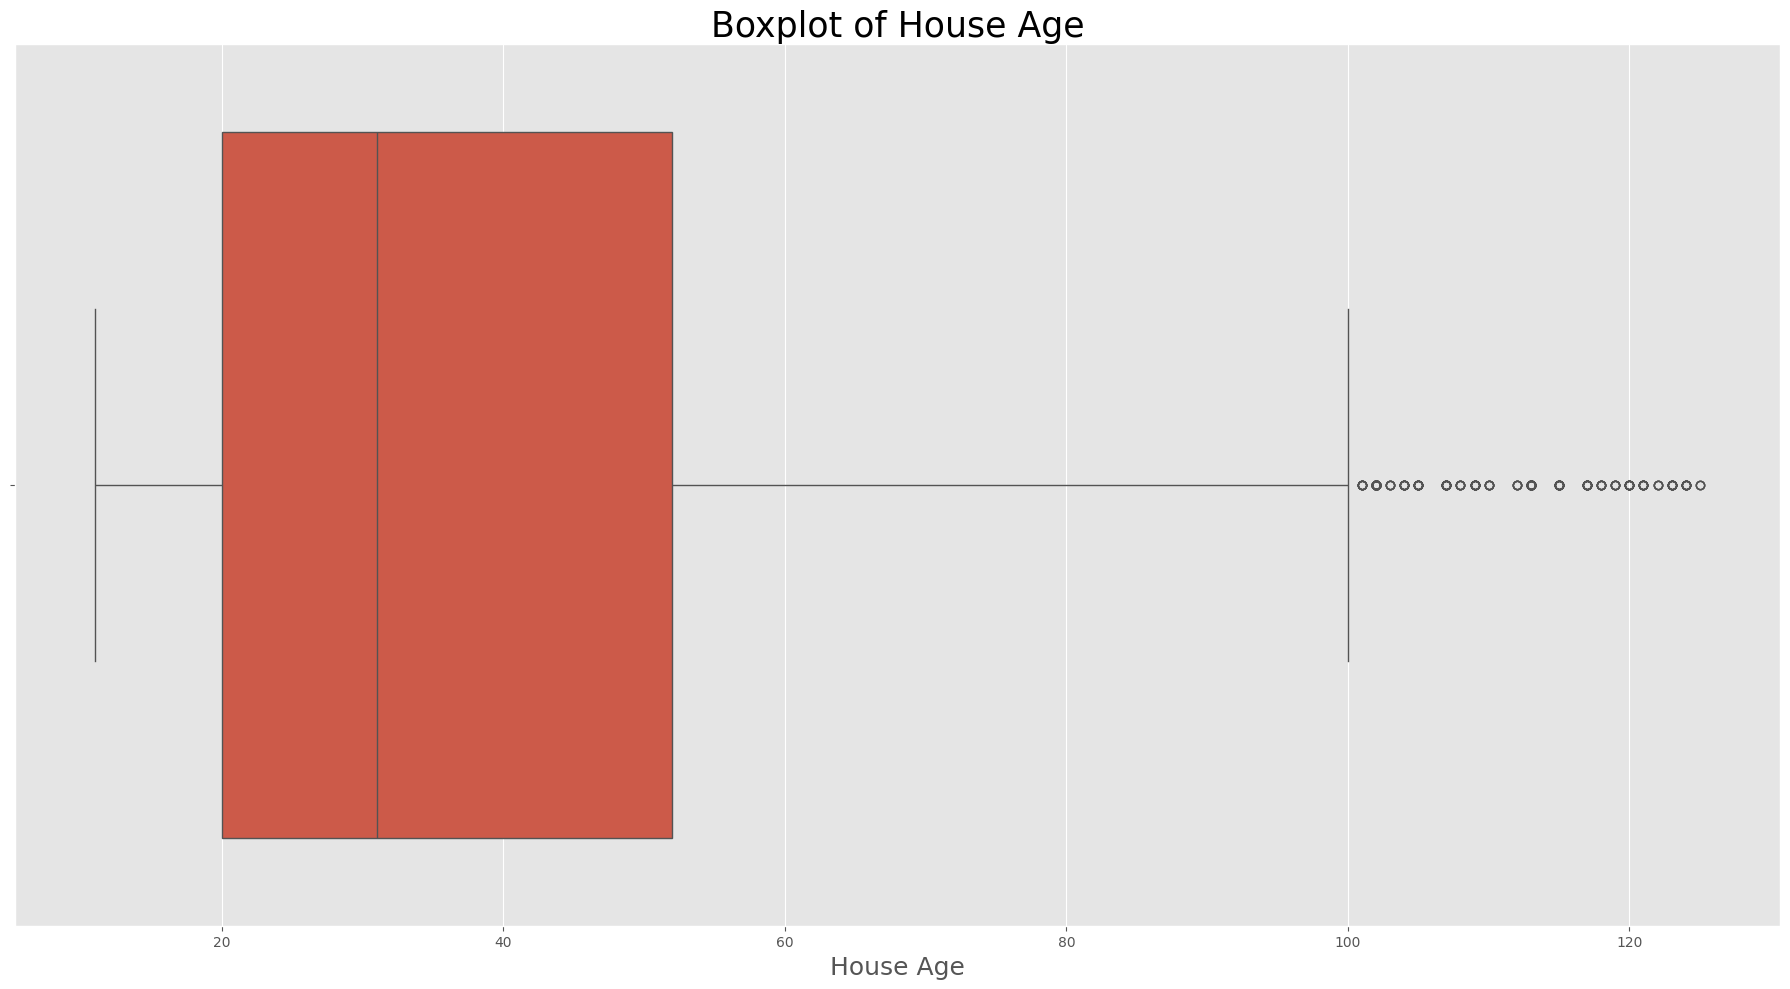

In [61]:
plt.figure(figsize=(18,10))
sns.boxplot(x='house_age',data=df)
plt.title('Boxplot of House Age',fontsize=25)
plt.xlabel('House Age',fontsize=18)
plt.tight_layout()
# plt.ylabel('Price',fontsize=18)
plt.show()

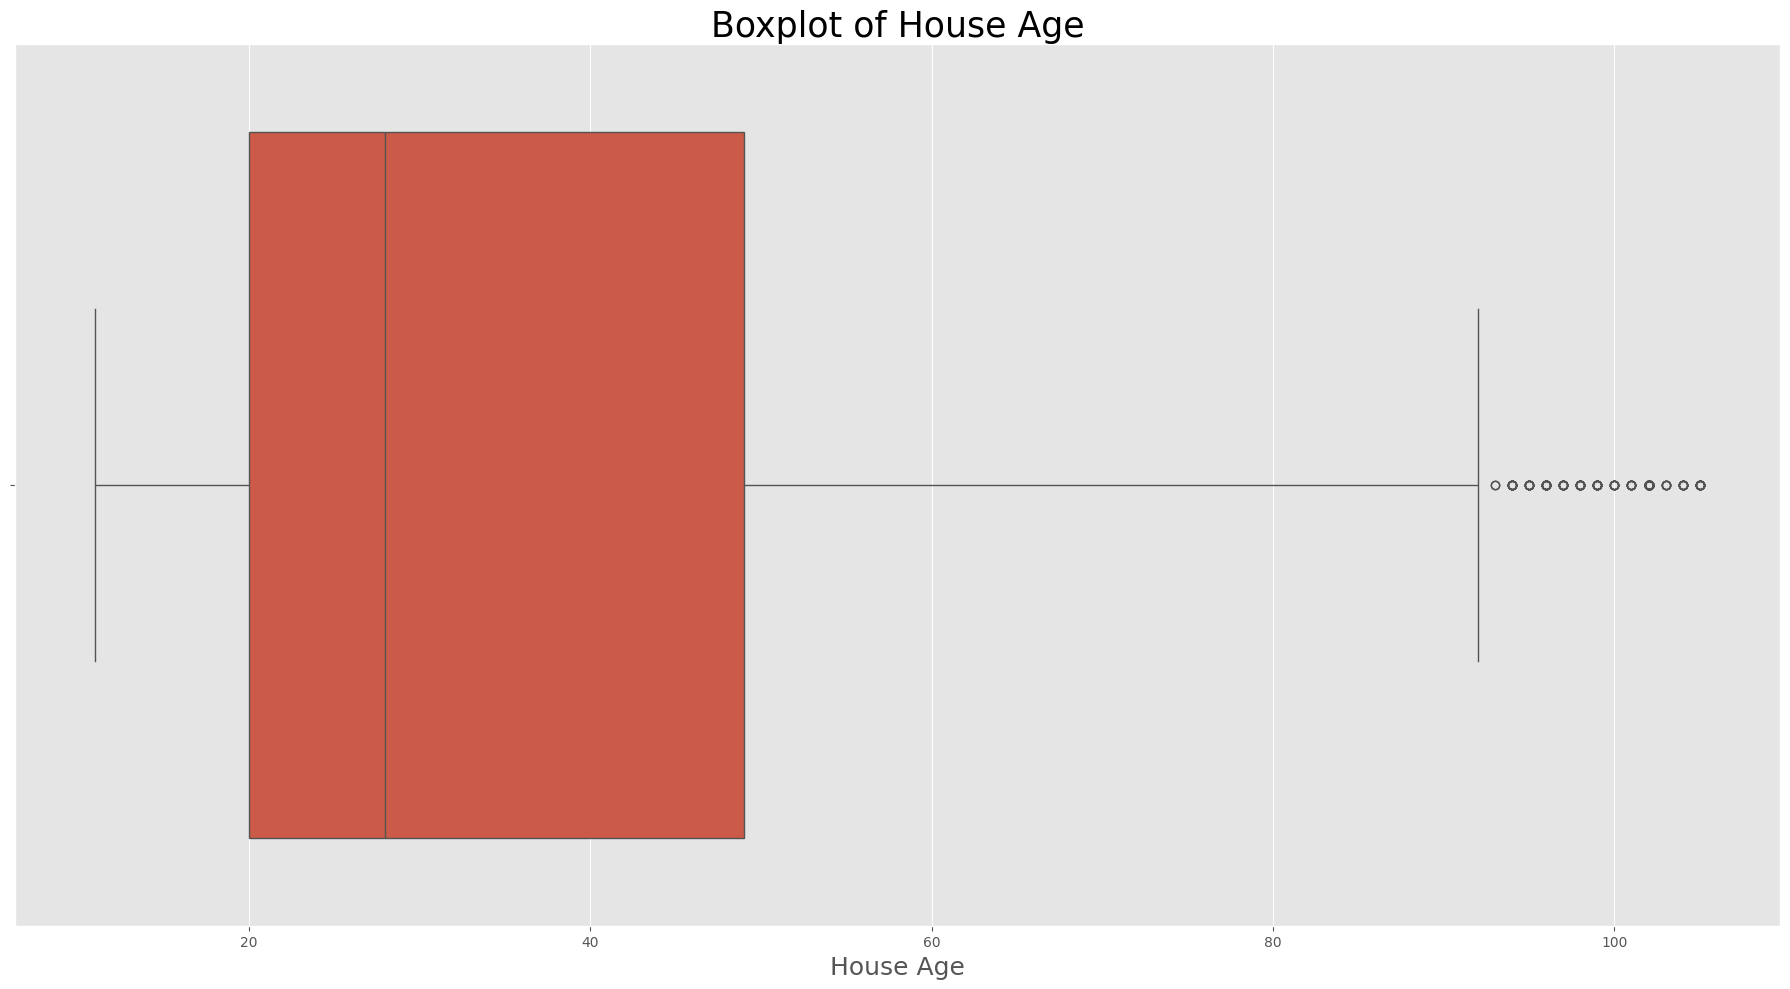

In [82]:
plt.figure(figsize=(18,10))
sns.boxplot(x='house_age',data=cleaned_data)
plt.title('Boxplot of House Age',fontsize=25)
plt.xlabel('House Age',fontsize=18)
plt.tight_layout()
# plt.ylabel('Price',fontsize=18)
plt.show()

# ------------------------------------------------------

In [85]:
cleaned_data.to_csv('cleaned_house_pricing1.csv', index=False)